# Uniswap v3 liquidity analysis

In [ ]:
%load_ext autoreload
%autoreload 2

In [35]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt

from eth_defi.uniswap_v3.events import fetch_events_to_csv
from eth_defi.uniswap_v3.liquidity import create_tick_delta_csv, create_tick_csv, get_pool_state_at_block

In [ ]:
json_rpc_url = os.environ["JSON_RPC_URL"]

In [241]:
# 1000000 blocks after v3 factory created
fetch_events_to_csv(json_rpc_url, end_block=13_369_621)

In [5]:
tick_delta_csv = create_tick_delta_csv("/tmp/uniswapv3-Mint.csv", "/tmp/uniswapv3-Burn.csv")

In [6]:
tick_csv = create_tick_csv(tick_delta_csv)

In [8]:
tick_df = pd.read_csv(tick_csv)
tick_df

,Unnamed: 0,pool_contract_address,tick_id,liquidity_gross_delta,liquidity_net_delta
0,0,0x0001fcbba8eb491c3ccfeddc5a5caba1a98c4c28,-92200,303015134493562686441,303015134493562686441
1,1,0x0001fcbba8eb491c3ccfeddc5a5caba1a98c4c28,0,303015134493562686441,-303015134493562686441
2,2,0x000ea4a83acefdd62b1b43e9ccc281f442651520,-89280,0,0
3,3,0x000ea4a83acefdd62b1b43e9ccc281f442651520,-88620,0,0
4,4,0x000ea4a83acefdd62b1b43e9ccc281f442651520,-87780,0,0
...,...,...,...,...,...
71252,71252,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,9960,0,0
71253,71253,0xffe6008fcf63732ec8f666a91bf32e9be4eb7d56,-138180,6232512986111875,6232512986111875
71254,71254,0xffe6008fcf63732ec8f666a91bf32e9be4eb7d56,-71940,262508667248348732806,262508667248348732806
71255,71255,0xffe6008fcf63732ec8f666a91bf32e9be4eb7d56,14820,262508667248348732806,-262508667248348732806


In [9]:
# pool ETH/aETH 0.3%
pool_address = "0xff9704a23d4c4f57c69d86e1113c1e9204cd804e"

In [11]:
df = tick_df[tick_df.pool_contract_address == pool_address].sort_values(by="tick_id")
df.index = df.tick_id

df

,Unnamed: 0,pool_contract_address,tick_id,liquidity_gross_delta,liquidity_net_delta
tick_id,,,,,
-9120,71209,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-9120,0,0
-6960,71210,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-6960,0,0
-6900,71211,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-6900,2832938971364323445,2832938971364323445
-6720,71212,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-6720,1039748260295437283560,1039748260295437283560
-4320,71213,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-4320,25894850070535641531,25894850070535641531
-3540,71214,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-3540,11962449660488089374,11962449660488089374
-1980,71215,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-1980,0,0
-1800,71216,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-1800,26434967067209505654,26434967067209505654
-1620,71217,0xff9704a23d4c4f57c69d86e1113c1e9204cd804e,-1620,0,0


In [25]:
tickdelta_df = pd.read_csv(tick_delta_csv)
last_processed_block = tickdelta_df[tickdelta_df.pool_contract_address == pool_address].tail(1).block_number
last_processed_block = int(last_processed_block.values[0])

<AxesSubplot:xlabel='tick_id'>

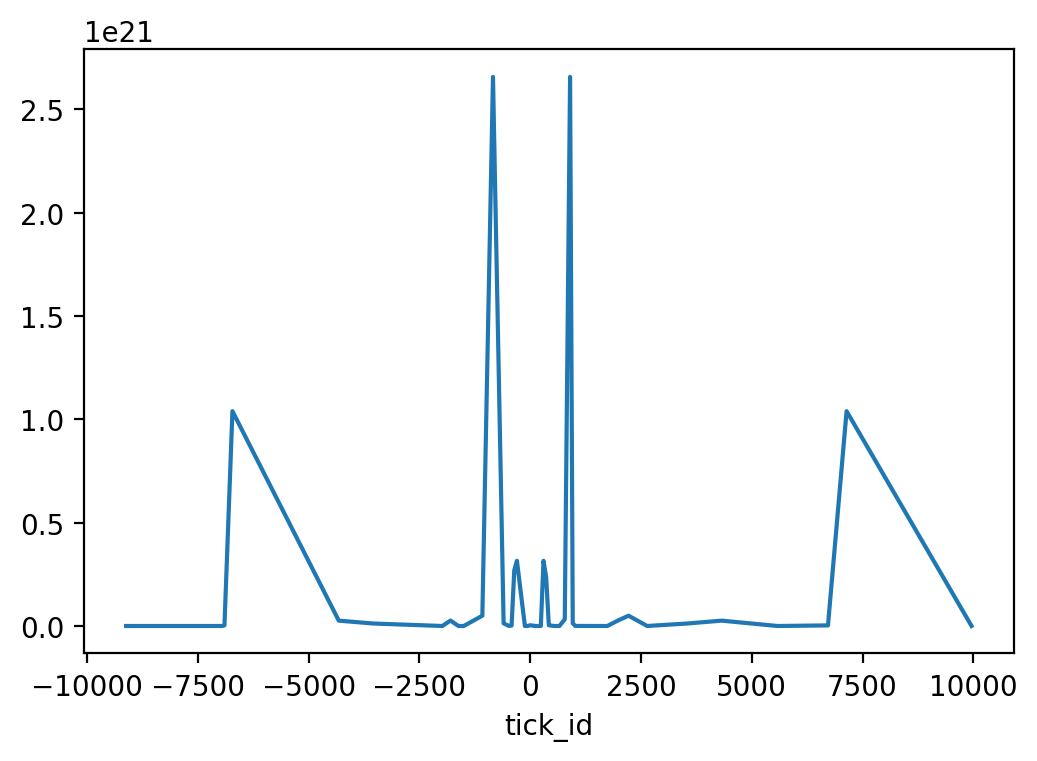

In [12]:
plt.rcParams["figure.dpi"] = 200

df["liquidity_gross_delta"].astype(float).plot()

In [29]:
pool_state = get_pool_state_at_block(pool_address, last_processed_block)

In [41]:
ticks = pool_state["ticks"]

# get some random ticks from subgraph
for i in range(100):
    random_tick = random.choice(ticks)
    print(random_tick)

    # get the same tick from dataframe
    random_tick_df = df[df.tick_id == int(random_tick["tickIdx"])]

    # compare data
    assert int(random_tick_df.liquidity_gross_delta.values[0]) == int(random_tick["liquidityGross"])
    assert int(random_tick_df.liquidity_net_delta.values[0]) == int(random_tick["liquidityNet"])

{'tickIdx': '1080', 'liquidityNet': '-215570258105465515', 'liquidityGross': '215570258105465515'}
{'tickIdx': '420', 'liquidityNet': '-3529055952285530573', 'liquidityGross': '3529055952285530573'}
{'tickIdx': '4320', 'liquidityNet': '-25894850070535641531', 'liquidityGross': '25894850070535641531'}
{'tickIdx': '-360', 'liquidityNet': '269164718674212583996', 'liquidityGross': '269164718674212583996'}
{'tickIdx': '-1800', 'liquidityNet': '26434967067209505654', 'liquidityGross': '26434967067209505654'}
{'tickIdx': '900', 'liquidityNet': '-2657515805071897210747', 'liquidityGross': '2657515805071897210747'}
{'tickIdx': '360', 'liquidityNet': '-236538190287385730415', 'liquidityGross': '236538190287385730415'}
{'tickIdx': '-6900', 'liquidityNet': '2832938971364323445', 'liquidityGross': '2832938971364323445'}
{'tickIdx': '480', 'liquidityNet': '-1852179364474719323', 'liquidityGross': '1852179364474719323'}
{'tickIdx': '960', 'liquidityNet': '-12657338330027594650', 'liquidityGross': '1